In [1]:
import pandas as pd
import numpy as np
from PIL import Image

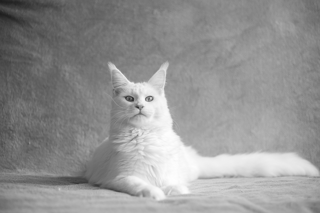

In [2]:
img = Image.open('images/cat.jpeg').convert('L').resize((640 // 2,426 // 2))
img

In [3]:
imgMat = np.array(img)
imgMat

array([[ 30,  30,  34, ..., 114, 113, 112],
       [ 30,  29,  31, ..., 118, 116, 112],
       [ 33,  33,  32, ..., 118, 117, 115],
       ...,
       [122, 122, 121, ..., 113, 115, 116],
       [125, 127, 128, ..., 111, 112, 113],
       [123, 125, 128, ..., 112, 112, 113]], dtype=uint8)

In [4]:
vert_rcross_mask = np.array([[0,1],[-1,0]])
hori_rcross_mask = np.array([[1,0],[0,-1]])

In [5]:
import math
def toArr(i,j):
    return np.array([imgMat[i-1][j-1],imgMat[i-1][j],imgMat[i][j-1],imgMat[i][j]])
edgeMat = imgMat.copy()
for i in range(1,len(imgMat)):
    for j in range(1,len(imgMat[0])):
        arr = toArr(i,j)
        x = sum(arr* vert_rcross_mask.flatten())
        y = sum(arr*hori_rcross_mask.flatten())
        edgeMat[i][j] = math.ceil(math.sqrt(x**2 + y**2))

In [6]:
final = Image.fromarray(edgeMat)

In [7]:
final.save('images/robert.jpeg')

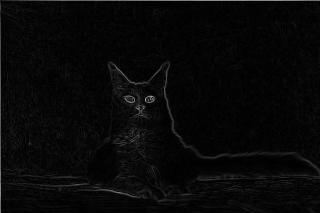

In [8]:
final